In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import *
admit = pd.read_csv("admit.csv")
pos = admit.loc[admit.accepted == 1].index.values
neg = admit.loc[admit.accepted == 0].index.values

# sns.scatterplot(x=admit.test_1[pos], y=admit.test_2[pos])
# sns.scatterplot(x=admit.test_1[neg], y=admit.test_2[neg])

admit.insert(0, 'ones', 1)
train_x = admit.iloc[:int(len(admit) * 0.7), :-1].to_numpy()
train_y = np.reshape(admit.iloc[:int(len(admit) * 0.7), -1].to_numpy(), (int(len(admit) * 0.7), 1))
test_x = admit.iloc[int(len(admit) * 0.7):, :-1].to_numpy()
test_y = np.reshape(admit.iloc[int(len(admit) * 0.7):, -1].to_numpy(), (int(len(admit) * 0.3), 1))
M = admit.shape[0]
m = train_x.shape[0]
# admit

In [17]:
def sigmoid(z):
    z = np.ones(z.shape) / (1 + np.exp(-z))
    return z

alpha = 0.001
iterations = 1500 # Make admit run faster
theta = np.matrix(np.zeros([train_x.shape[1]])).astype(float).T
def compute_cost(x, y, theta):
    hypothesis = sigmoid(x * theta)
    # these costs are equal
    # cost = 1/m * sum(np.multiply(-y, np.log(hypothesis)) - 
                     # np.multiply((1 - y), np.log(1 - hypothesis)))
    cost = -1/m * sum(np.multiply(y, np.log(hypothesis)) + np.multiply((1 - y), np.log(1 - hypothesis)))
    return cost

In [15]:
sigmoid(np.array([0, 1]))

array([0.5       , 0.73105858])

[[-0.11311122]
 [ 0.01478922]
 [-0.00239546]]
[[0.67223507]]


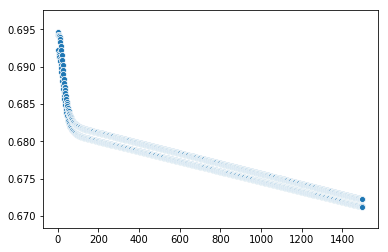

In [18]:
# logistic regression on training data
J_history = np.array([0, 0])
for iters in range(1, iterations):
    hypo = sigmoid(train_x * theta)
    theta = theta - alpha * 1/m * train_x.T * (hypo - train_y) 
    cost = np.array([iters, compute_cost(train_x, train_y, theta)], dtype=object)
    J_history = np.vstack((J_history, cost))
print(theta)
print(compute_cost(train_x, train_y, theta)) 
J_history = np.delete(J_history, 0, axis=0)
sns.scatterplot(x=J_history[:, 0], y=J_history[:, 1])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(admit.test_1[pos], admit.test_2[pos])
plt.scatter(admit.test_1[neg], admit.test_2[neg])
data = np.reshape(admit.test_1.to_numpy(), (M, 1))
y = (data * -theta[1] - theta[0]) / theta[2]
plt.plot(admit.test_1, y)

In [ ]:
plt.plot(J_history[:, 0], J_history[:, 1])

In [ ]:
def predict(x):
    predict = sigmoid(np.dot(x, (np.array([[-6.65617611],[ 0.06092167],[ 0.04681831]]))))
    # print(predict)
    predict[predict >= 0.5] = 1
    predict[predict < 0.5] = 0
    return predict

In [ ]:
d = np.concatenate([predict(test_x), test_y], axis=1)
acc_test = round(sum(d[:, 0] == d[:, 1])/len(test_y), 2)
e = np.concatenate([predict(train_x), train_y], axis=1)
acc_train = round(sum(e[:, 0] == e[:, 1])/len(train_y), 2

In [ ]:
# logistic regression on entire data set
J_history = np.array([0, 0])
all_x = admit.iloc[:, :-1].to_numpy()
all_y = np.reshape(((admit.iloc[:, -1]).to_numpy()), (100, 1))
for iters in range(1, iterations):
    hypo = sigmoid(all_x * theta) # fix function 
    theta = theta - alpha * 1/M * all_x.T * (hypo - all_y) # theta has positive values bc grad has negative. theta - (-number) = pos 
    cost = np.array([iters, compute_cost(all_x, all_y, theta)], dtype=object) # cost is diff from Matlab, bc we computed cost after changing thetas
    J_history = np.vstack((J_history, cost))
    # print(iters, np.round(theta, 4), '\n')
print('theta', theta) 
print(compute_cost(all_x, all_y, theta)) # need cost to stop at 0
J_history = np.delete(J_history, 0, axis=0)
sns.scatterplot(x=J_history[:, 0], y=J_history[:, 1])